In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.patches as patches
warnings.filterwarnings("ignore")
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
from PIL import Image
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

________________________________________________

In [3]:
events = pd.read_csv('./JSON/Arsenal_19-20/pepe_arse_all.csv')

In [4]:
mask = (events['Player'] == 239872)
pepe = events.loc[mask]
pepe

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
1257,SubstitutionOn,70,25.0,239872.0,13,Successful,0.0,0.0,NaN,NaN,OpenPlay,False,NaN
1295,BallRecovery,72,23.0,239872.0,13,Successful,68.7,14.1,NaN,NaN,OpenPlay,False,NaN
1296,TakeOn,72,27.0,239872.0,13,Unsuccessful,85.6,12.1,NaN,NaN,OpenPlay,False,NaN
1308,Pass,73,7.0,239872.0,13,Unsuccessful,78.2,12.6,76.0,0.0,OpenPlay,False,NaN
1389,Pass,77,12.0,239872.0,13,Successful,19.9,9.7,11.0,5.9,OpenPlay,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71830,CornerAwarded,53,30.0,239872.0,13,Successful,98.8,65.2,NaN,NaN,OpenPlay,False,NaN
71908,Pass,58,46.0,239872.0,13,Successful,49.0,3.5,30.3,3.8,OpenPlay,False,NaN
71931,Dispossessed,60,33.0,239872.0,13,Successful,69.8,1.8,NaN,NaN,OpenPlay,False,NaN
71942,Aerial,61,16.0,239872.0,13,Unsuccessful,88.3,45.6,NaN,NaN,OpenPlay,False,NaN


In [46]:
mask = (pepe['passtype'] == 'BigChanceCreated')
big_chance = pepe.loc[mask]
len(big_chance)

12

In [123]:
mask = (pepe['passtype'] == 'BigChanceCreated') & (pepe['Event'] == 'Pass') & (pepe['Assist_2nd'] != True) & (pepe['X'] < 99) & (pepe['Y'] < 99) & ((pepe['X'] > 1) & (pepe['Y'] > 1))
pepe_bcc = pepe.loc[mask]
pepe_bcc

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
6173,Pass,84,32.0,239872.0,13,Successful,75.1,27.0,90.8,53.7,BigChanceCreated,False,False
12856,Pass,17,59.0,239872.0,13,Successful,82.8,14.3,95.9,59.0,BigChanceCreated,True,False
25919,Pass,68,37.0,239872.0,13,Unsuccessful,85.3,26.0,86.3,29.5,BigChanceCreated,True,NaN
27825,Pass,91,26.0,239872.0,13,Successful,69.8,39.1,77.9,58.5,BigChanceCreated,False,NaN
51831,Pass,49,9.0,239872.0,13,Successful,98.3,34.9,93.0,49.7,BigChanceCreated,False,False
52542,Pass,94,37.0,239872.0,13,Successful,92.5,25.8,88.9,44.1,BigChanceCreated,True,False
59998,Pass,51,6.0,239872.0,13,Successful,61.1,12.5,86.7,34.6,BigChanceCreated,False,NaN
62166,Pass,79,52.0,239872.0,13,Successful,75.8,76.7,91.9,44.3,BigChanceCreated,True,False


In [26]:
mask = (pepe['Event'] == 'Goal') & (pepe['Y'] != 50) & (pepe['Event'] == 'Goal') & (pepe['Y'] != 50.7) & (pepe['Event'] == 'Goal') & (pepe['Y'] != 50.1)
pepe_goal = pepe.loc[mask]
len(pepe_goal)

6

In [108]:
mask = (pepe['Assist'] == True) & (pepe['Outcome'] == 'Successful') 
pepe_assist = pepe.loc[mask]
pepe_assist

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
12856,Pass,17,59.0,239872.0,13,Successful,82.8,14.3,95.9,59.0,BigChanceCreated,True,False
24592,Pass,84,44.0,239872.0,13,Successful,76.9,22.1,76.9,38.8,ShotAssist,True,False
52542,Pass,94,37.0,239872.0,13,Successful,92.5,25.8,88.9,44.1,BigChanceCreated,True,False
62166,Pass,79,52.0,239872.0,13,Successful,75.8,76.7,91.9,44.3,BigChanceCreated,True,False


In [112]:
mask = ((pepe['Assist_2nd'] == True) & (pepe['Y'] != 6.4)) & (pepe['Y'] != 28.8)
pepe_assist2 = pepe.loc[mask]
pepe_assist2

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
3959,Pass,45,58.0,239872.0,13,Successful,84.4,74.5,88.1,59.3,BigChanceCreated,False,True
45774,Pass,66,49.0,239872.0,13,Successful,78.5,37.3,85.5,64.7,BigChanceCreated,False,True
48568,Pass,45,21.0,239872.0,13,Successful,89.9,14.0,91.6,50.7,ShotAssist,False,True
51907,Pass,53,37.0,239872.0,13,Successful,77.9,20.7,93.3,61.2,BigChanceCreated,False,True
52451,Pass,89,4.0,239872.0,13,Successful,84.9,34.5,91.2,40.2,OpenPlay,False,True


In [49]:
mask3 = (pepe['Event'] == 'MissedShots') | (pepe['Event'] == 'SavedShot') | (pepe['Event'] == 'Goal')
pepe_shots = pepe.loc[mask3]
len(pepe_shots)

63

In [ ]:
mask3 = (pepe['Event'] == 'MissedShots') | (pepe['Event'] == 'SavedShot')
pepe_shot = pepe.loc[mask3]
len(pepe_shot)

In [30]:
mask5 = (pepe['passtype'] != 'IntentionalGoalAssist') & (pepe['passtype'] != 'BigChanceCreated') & (pepe['X'] < 99) & (pepe['Y'] < 99) & ((pepe['X'] > 1) & (pepe['Y'] > 1))
touch = pepe.loc[mask5]

In [31]:
# mesut["endX"] = pd.to_numeric(events["endX"])
# mesut["endY"] = pd.to_numeric(events["endY"])

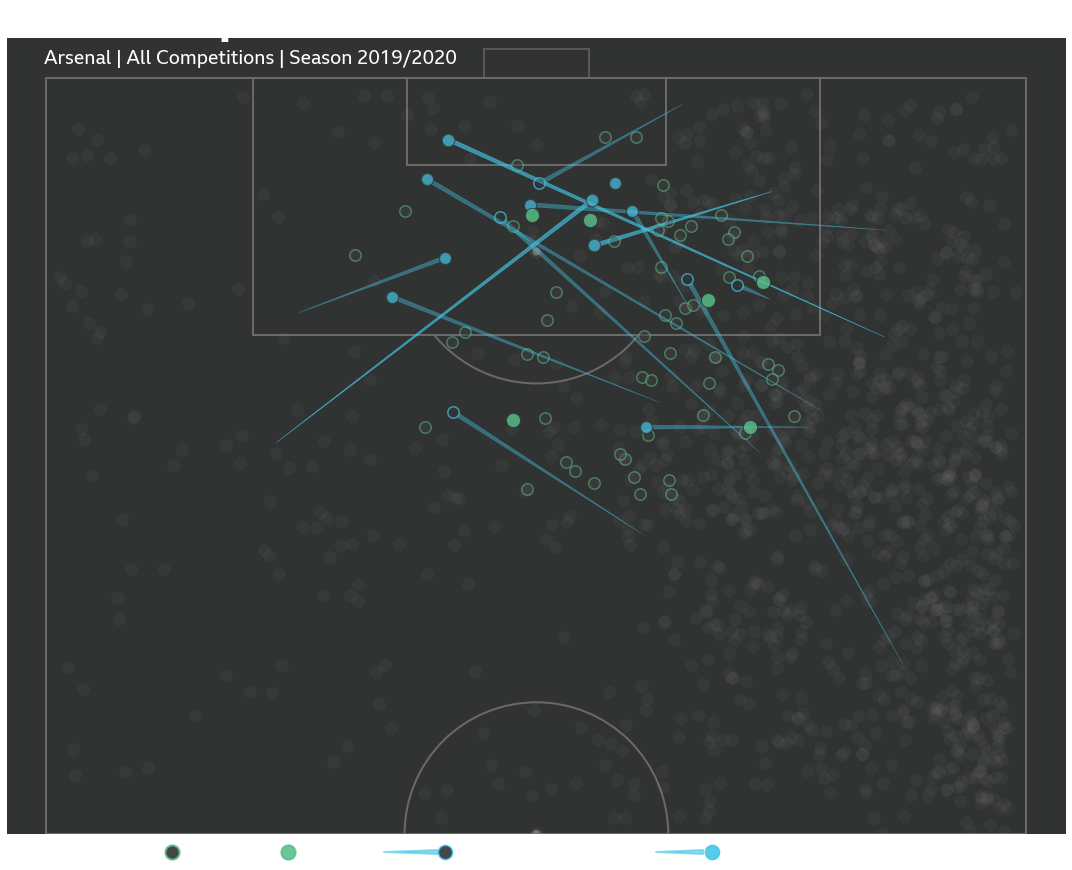

In [134]:
background = "#313332"
line = '#696969'
text_color ='white'
touches = '#f62681'
assisted = "#45c7e8"
goal = '#59c08a'
title_font = "BBC Reith Sans"
body_font = "BBC Reith Sans"

pitch = Pitch(figsize=(15,15),orientation='vertical',view='half',goal_type='box',pitch_type='opta', pad_bottom=-0.008,
#               axis=True, label=True, tick=True,
              pitch_color=background, line_color=line,constrained_layout=False)

fig, ax = pitch.draw()

#touches
x = touch.X.values
y = touch.Y.values
ax.scatter(y,x,color='white', s=150, zorder=12, alpha=0.03)

#assists
style="wedge,tail_width=0.4"
xA = pepe_assist.X.values
yA = pepe_assist.Y.values
xEA = pepe_assist.endX.values
yEA = pepe_assist.endY.values

plt.scatter(yEA,xEA,color=assisted, s=150, ec=background, lw=1.5,zorder=14, alpha=0.7)
plt.scatter(42,93,color=assisted, s=150, ec=background, lw=1.5,zorder=14, alpha=0.7)

for i in range(len(pepe_assist)):
    plt.annotate('', xy=(yA[i],xA[i]), xytext=(yEA[i],xEA[i]), zorder=12, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='#45c7e8', shrinkA=6, alpha=0.4))
    
xA2 = pepe_assist2.X.values
yA2 = pepe_assist2.Y.values
xEA2 = pepe_assist2.endX.values
yEA2 = pepe_assist2.endY.values

plt.scatter(yEA2,xEA2,color=assisted, s=150, ec=background, lw=1.5,zorder=14, alpha=0.7)

for i in range(len(pepe_assist2)):
    plt.annotate('', xy=(yA2[i],xA2[i]), xytext=(yEA2[i],xEA2[i]), zorder=12, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='#45c7e8', shrinkA=6, alpha=0.4))

    
#chances created
xC = pepe_bcc.X.values
yC = pepe_bcc.Y.values
xEC = pepe_bcc.endX.values
yEC = pepe_bcc.endY.values
plt.scatter(yEC,xEC,c=background, ec=assisted,lw=1.5, s=130, zorder=12, alpha=0.7)

for i in range(len(pepe_bcc)):
    plt.annotate('', xy=(yC[i],xC[i]), xytext=(yEC[i],xEC[i]), zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='#45c7e8', shrinkA=6, alpha=0.4)) 

#shots
xS = pepe_shot.X.values
yS = pepe_shot.Y.values

plt.scatter(yS,xS,color=background, ec=goal, lw=1.5, s=130, zorder=10, alpha=0.5)

#goals
xG = pepe_goal.X.values
yG = pepe_goal.Y.values
plt.scatter(yG,xG,color=goal, ec=background, lw=1, s=200, zorder=15, alpha=0.8)

fig.text(0.044, 0.8723, "Nicolas Pépé",fontsize=35, fontfamily=body_font, color=text_color, weight='bold',zorder=2)
fig.text(0.044, 0.845, "Arsenal | All Competitions | Season 2019/2020",fontsize=19, fontfamily=body_font, color=text_color,zorder=2)

n.set_path_effects([path_effects.withStroke(linewidth=4,foreground=assisted)])

ax3 = fig.add_axes([0.03,0.105,0.05,0.02])
ax3.axis("off")
ax3.scatter([0.03],[0.05],c='white', s=200, zorder=12, alpha=0.3)
fig.text(0.065, 0.11, "all passes",fontsize=16, fontfamily=body_font, color=text_color)

ax4 = fig.add_axes([0.138,0.105,0.05,0.02])
ax4.axis("off")
ax4.scatter([0.138],[0.05],ec=goal, c=background, s=200, linewidth=2, zorder=12, alpha=0.9)
fig.text(0.175, 0.11, "shots: 66",fontsize=16, fontfamily=body_font, color=text_color)

ax5 = fig.add_axes([0.245,0.105,0.05,0.02])
ax5.axis("off")
ax5.scatter([0.245],[0.05],c=goal, s=200, linewidth=2, zorder=12, alpha=0.9)
fig.text(0.282, 0.11, "goals: 8",fontsize=16, fontfamily=body_font, color=text_color)

ax6 = fig.add_axes([0.34,0.105,0.05,0.02])
ax6.axis("off")
ax6.annotate('', [0.34,0.5],[1.5,0.5], zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=2,  color=assisted, shrinkA=6, alpha=0.6))

ax7 = fig.add_axes([0.39,0.105,0.05,0.02])
ax7.axis("off")
ax7.scatter([0.39],[0.05],ec=assisted, c=background, s=200, linewidth=1.5, zorder=12, alpha=0.9)
fig.text(0.4265, 0.11, "big chances created: 12",fontsize=16, fontfamily=body_font, color=text_color)

ax8 = fig.add_axes([0.58,0.105,0.05,0.02])
ax8.axis("off")
ax8.annotate('', [0.58,0.5],[1.6,0.5], zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=2,  color=assisted, shrinkA=6, alpha=0.6))

ax9 = fig.add_axes([0.633,0.105,0.06,0.02])
ax9.axis("off")
ax9.scatter([0.633],[0.05], c=assisted, s=200, linewidth=1.5, zorder=12, alpha=0.9)
fig.text(0.675, 0.11, "assists: 10",fontsize=16, fontfamily=body_font, color=text_color)

fig.text(0.851, 0.112, "*penalties removed",fontsize=13, fontfamily=body_font, color=text_color, fontstyle='italic')
fig.text(0.851, 0.8723, "@jonollington",fontsize=16, fontfamily=body_font, color=text_color,)

plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("pepe_20",bbox_inches="tight",dpi=300);